# Name : Gobinath Periyasamy
# Roll No : CS21M501

## (2) . (ii) Assume that the same data was infact generated from a mixture of Gaussians with 4 mixtures. Implement the EM algorithm and plot the log-likelihood (averaged over 100 random initializations of the parameters) as a function of iterations. How does the plot compare with the plot from part (i)? Provide insights that you draw from this experiment.

### Assume that the same data was infact generated from a mixture of Gaussians with 4 mixtures. Implement the EM algorithm

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import cluster,datasets, mixture
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from numpy import linalg as LA

df = pd.read_csv("A2Q1.csv",header = None,prefix= 'column')

#### EM algorithm for Gaussian PDF

In [2]:
def gaussian_pdf(data, mean,variance):
    a1 = 1/(np.sqrt(2*np.pi*variance))
    a2 = np.exp(-(np.square(data-mean)/(2*variance)))
    return a1*a2

### Gaussians with 4 mixtures.

7.579883027169014 8.832467018089707 7.63493690411191 7.749346457713757
1.6514024294579142 1.6379896087295682 1.3790652487692365 1.4425922343826945


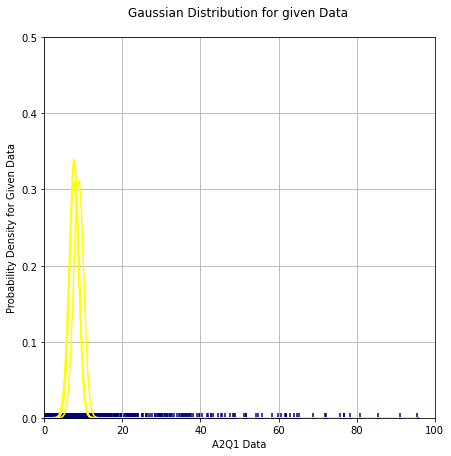

In [3]:
n_samples =250

# Random Mean values to start with

# mean0,sigma0 = random.uniform(5.0, 10.0),random.uniform(1.0, 2.0)
# mean1,sigma1 = random.uniform(5.0, 10.0),random.uniform(1.0, 2.0)
# mean2,sigma2 = random.uniform(5.0, 10.0),random.uniform(1.0, 2.0)
# mean3,sigma3 = random.uniform(5.0, 10.0),random.uniform(1.0, 2.0)

mean0,mean1,mean2,mean3 =  7.579883027169014, 8.832467018089707, 7.63493690411191, 7.749346457713757
sigma0,sigma1,sigma2,sigma3 = 1.6514024294579142, 1.6379896087295682, 1.3790652487692365, 1.4425922343826945

print(mean0,mean1,mean2,mean3)
print(sigma0,sigma1,sigma2,sigma3)

X = df.to_numpy()
np.random.shuffle(X)


starts = np.linspace(np.min(X),np.max(X),1000)

plt.figure(figsize = (7,7))

# Setting the X and Y Label
plt.xlabel('A2Q1 Data')
plt.ylabel('Probability Density for Given Data')
plt.title("Gaussian Distribution for given Data \n")
plt.xlim(0,100)
plt.ylim(0,0.500)
plt.scatter(X,[0.00005]*len(X), color = 'navy', s=5)
#plt.scatter(df.index,df['column0'], color = 'navy', s=20,marker = 2)
# visualizing plot using matplotlib.pyplot library

plt.scatter(X,[0.0005]*len(X), color = 'navy', s=20,marker = 2)
#plt.scatter(df.index,df['column0'], color = 'navy', s=20,marker = 2)
# visualizing plot using matplotlib.pyplot library

plt.plot(starts, gaussian_pdf(starts,mean0,sigma0),color = 'yellow')
plt.plot(starts, gaussian_pdf(starts,mean1,sigma1),color = 'yellow')
plt.plot(starts, gaussian_pdf(starts,mean2,sigma2),color = 'yellow')
plt.plot(starts, gaussian_pdf(starts,mean3,sigma3),color = 'yellow')
plt.grid()

plt.show()


In [4]:
# Finding the mix_prob

a = 2
b = 12

k = 4
mix_prob = np.ones((k)) /k
means = np.random.beta(a,b,k)
variance = np.random.random_sample(size=k)
print(means,variance)

[0.11943715 0.09532759 0.09057746 0.12702514] [0.80362582 0.8778077  0.66961357 0.95811224]


EM for Guassian Dsitribution 



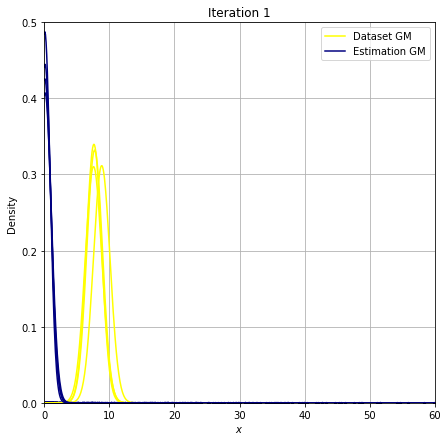

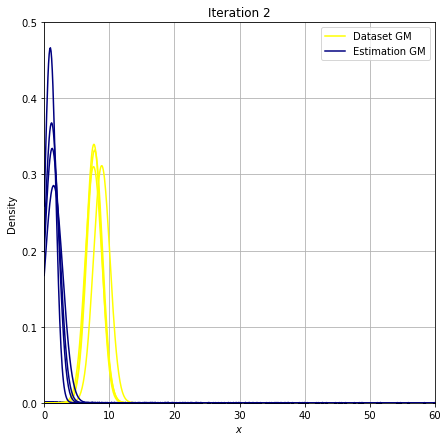

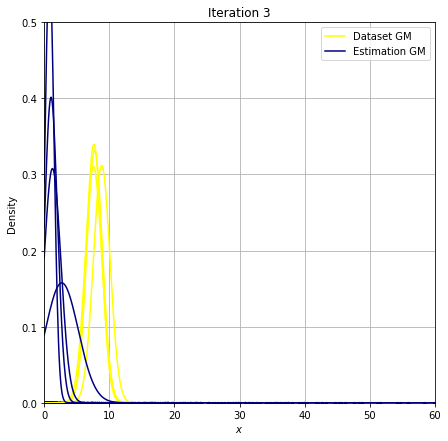

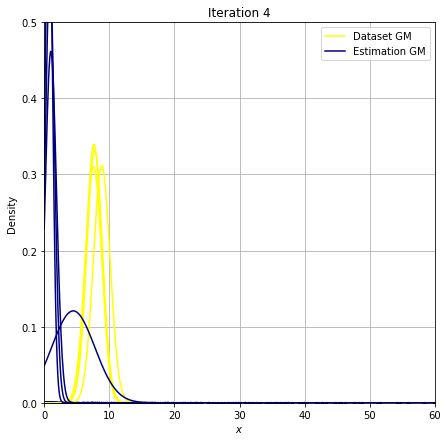

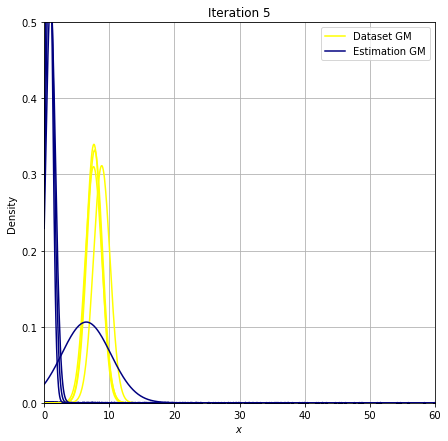

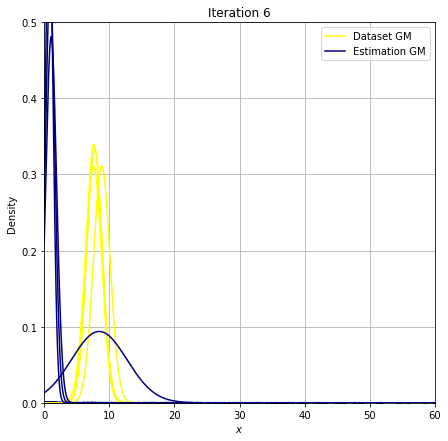

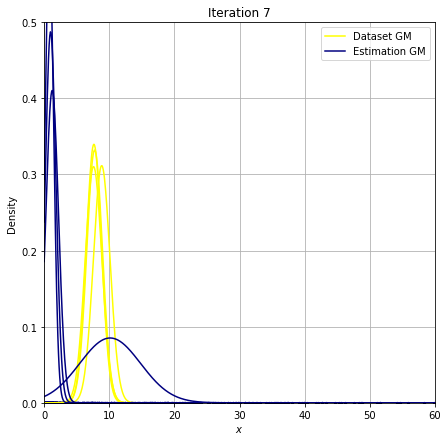

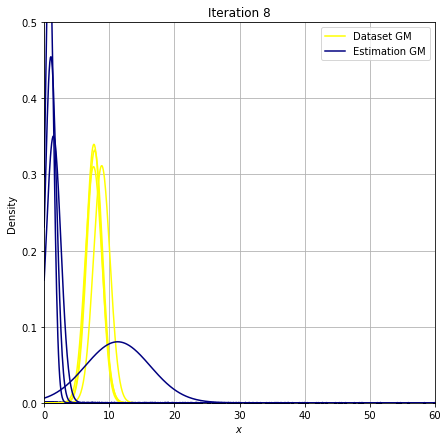

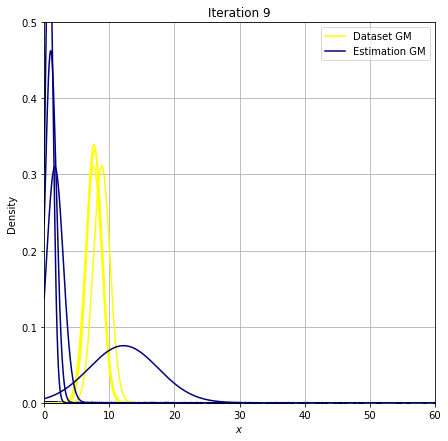

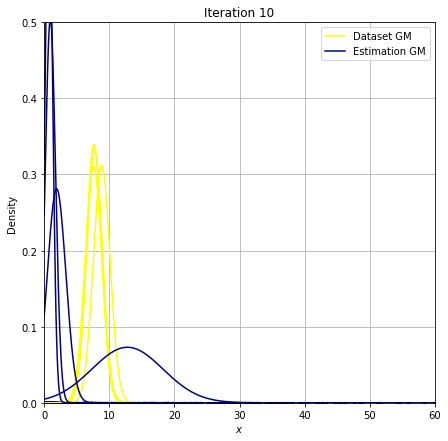

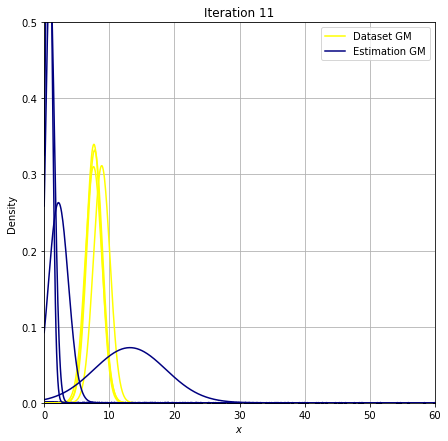

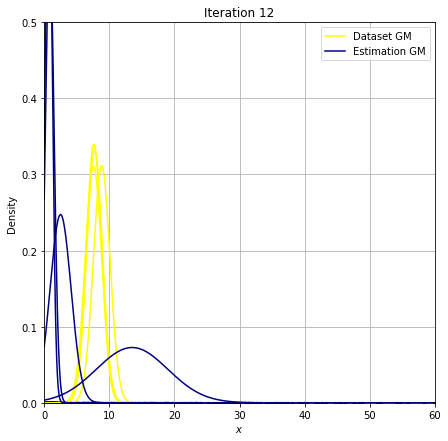

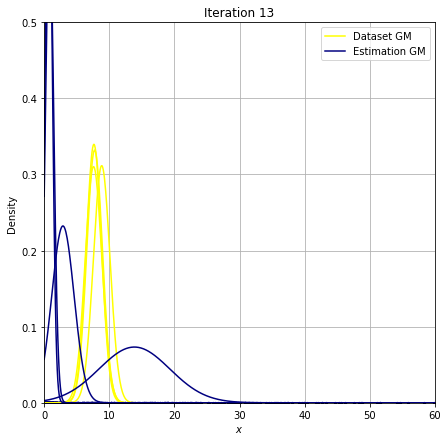

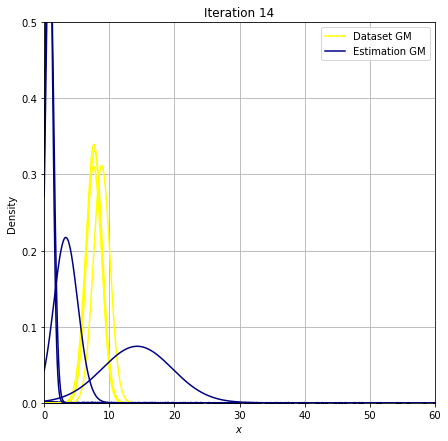

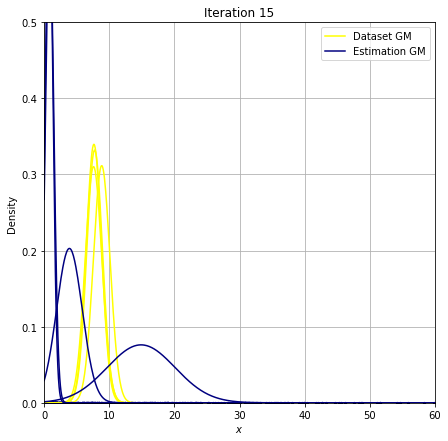

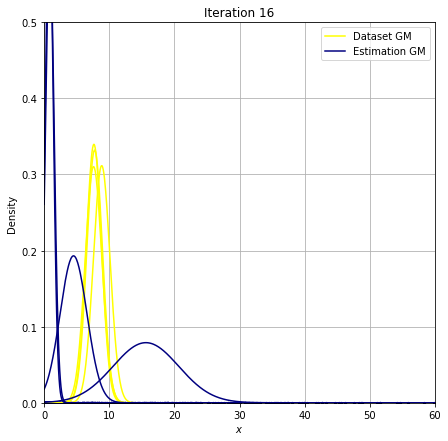

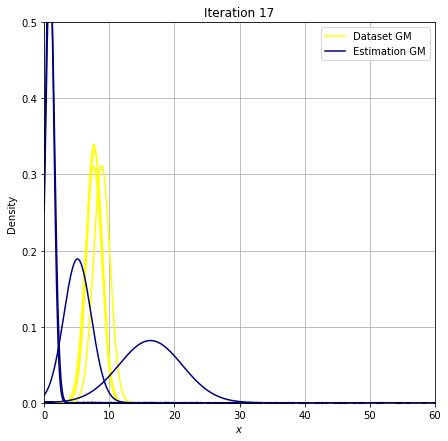

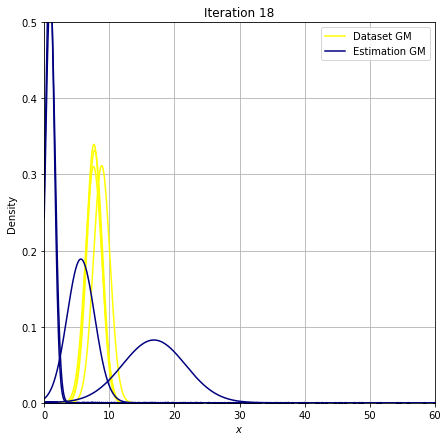

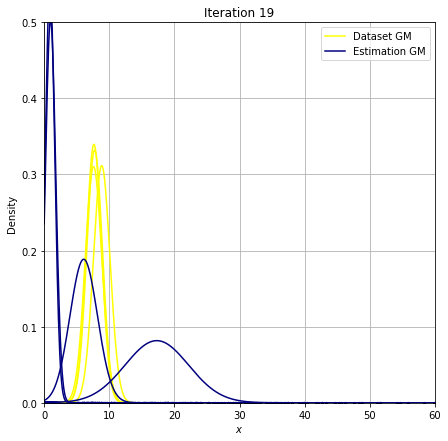

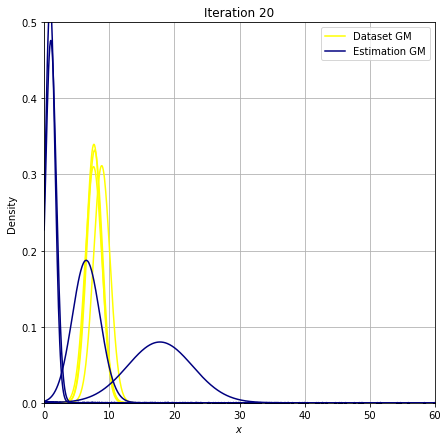

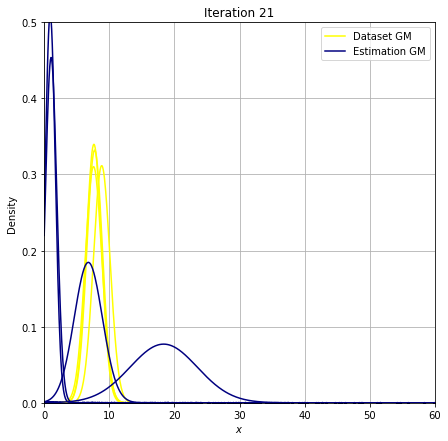

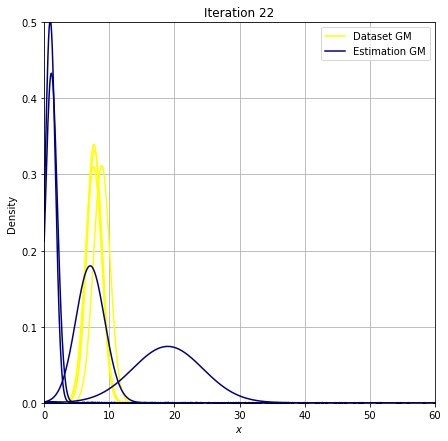

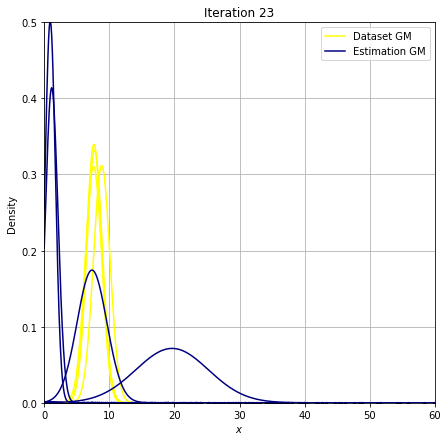

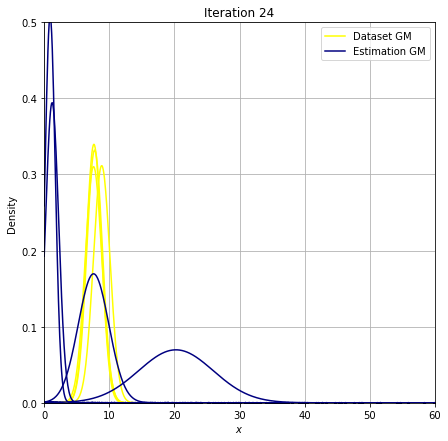

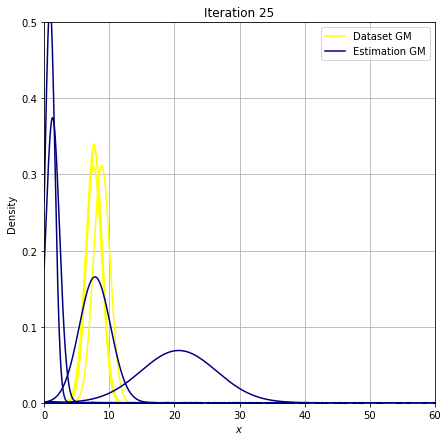

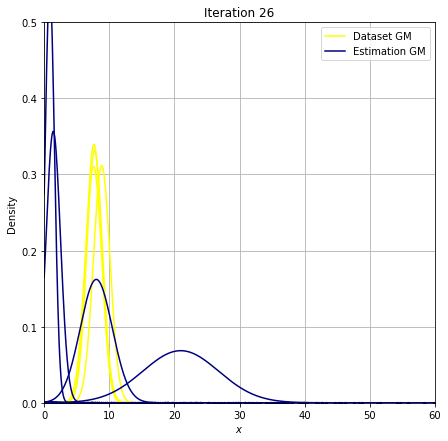

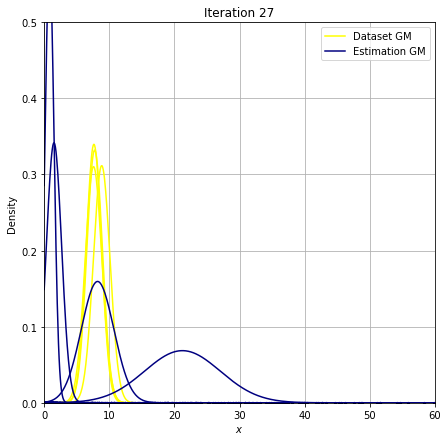

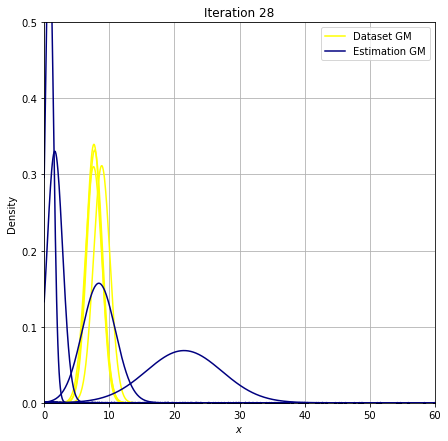

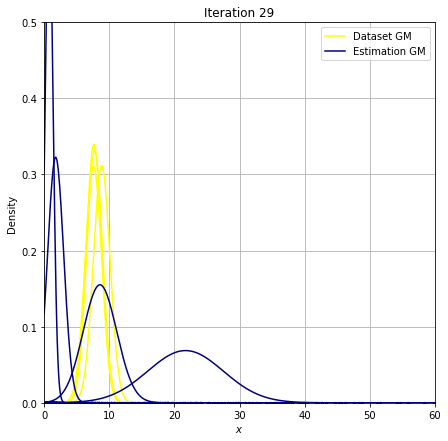

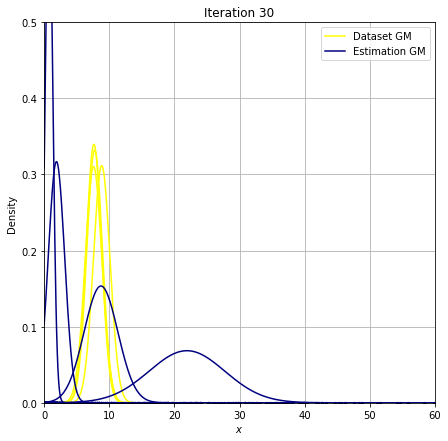

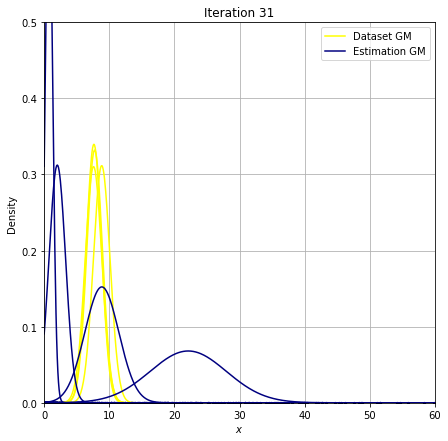

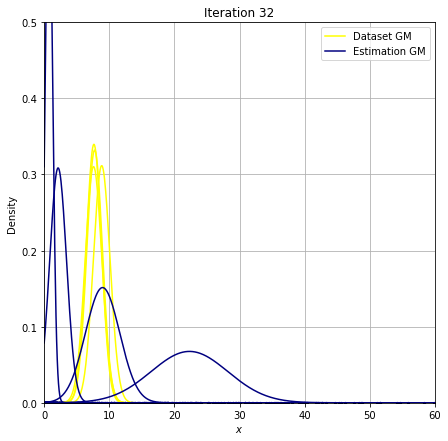

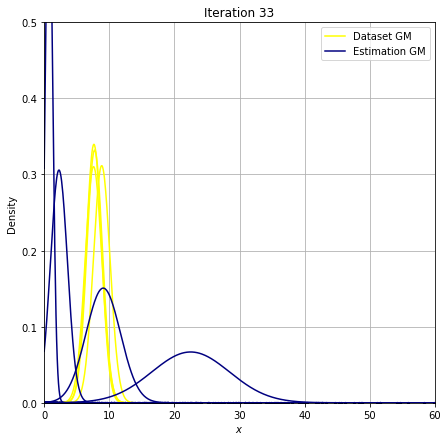

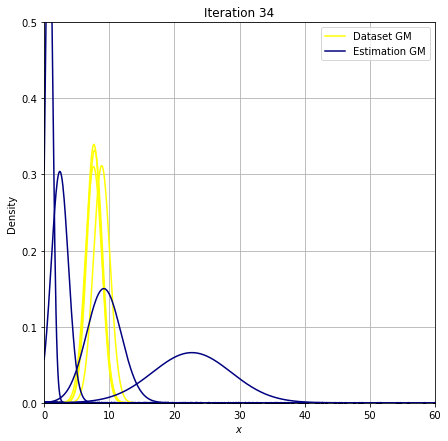

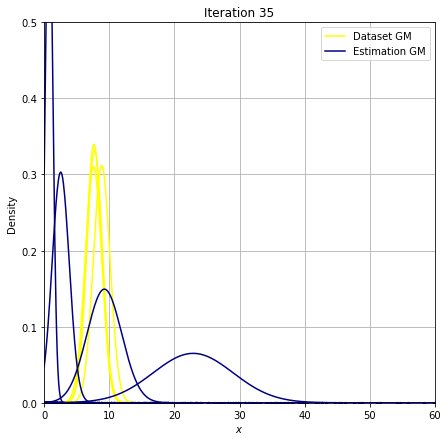

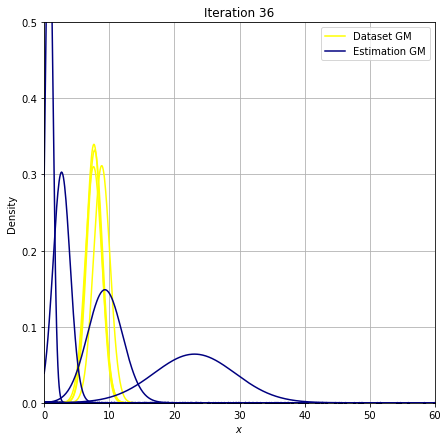

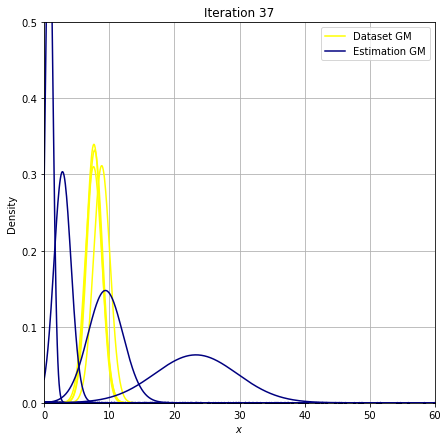

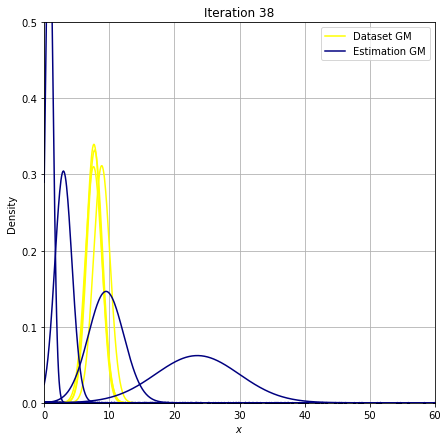

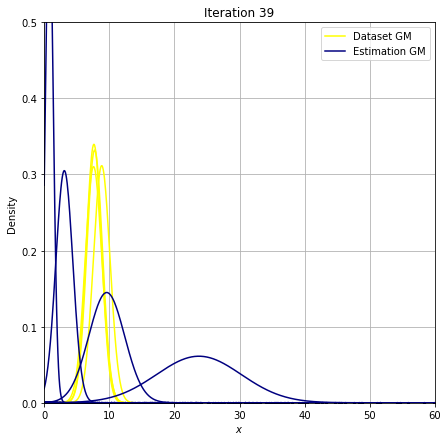

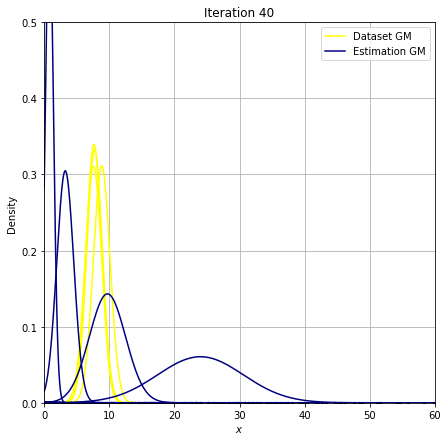

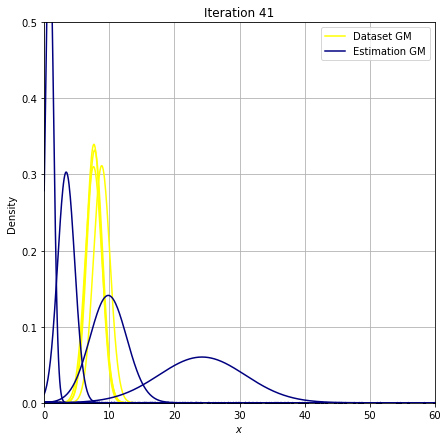

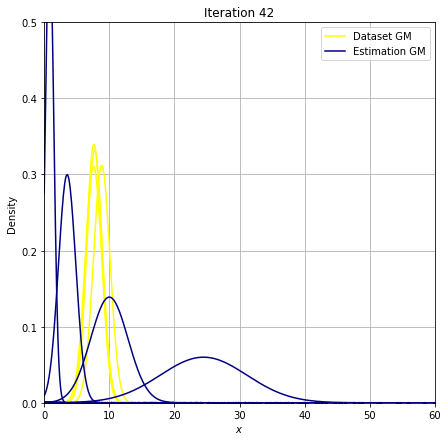

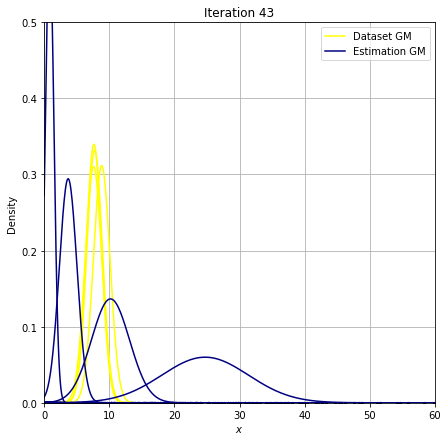

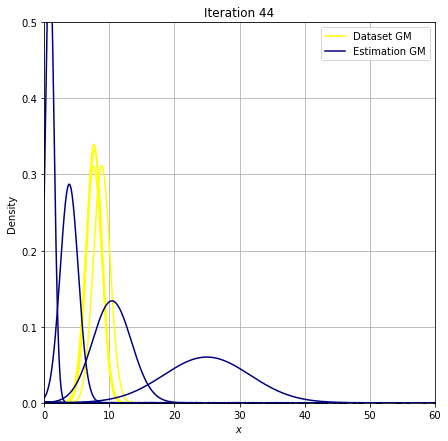

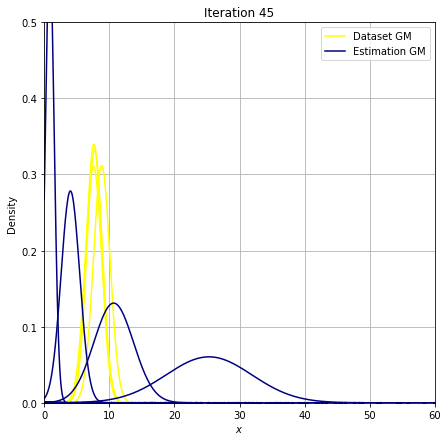

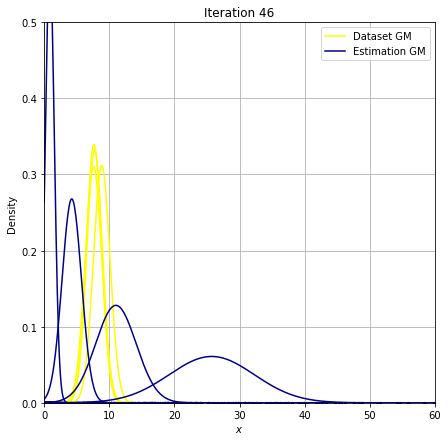

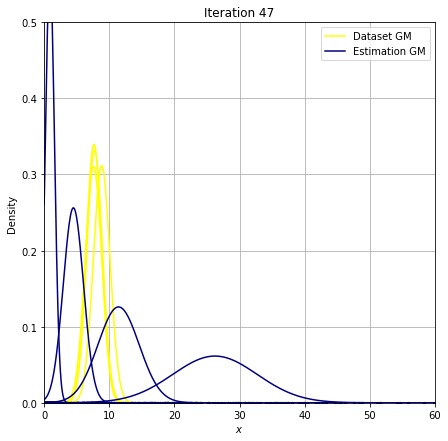

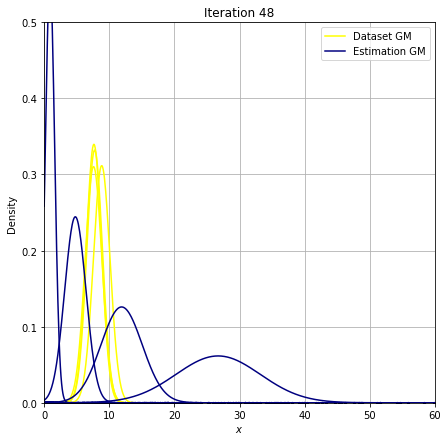

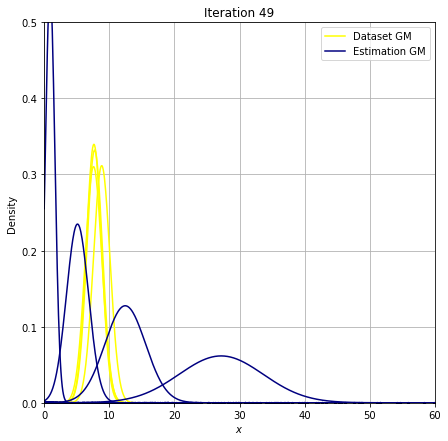

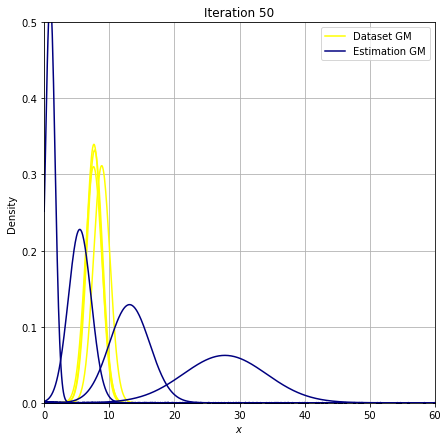

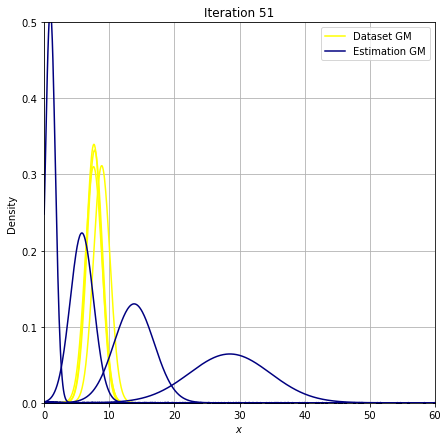

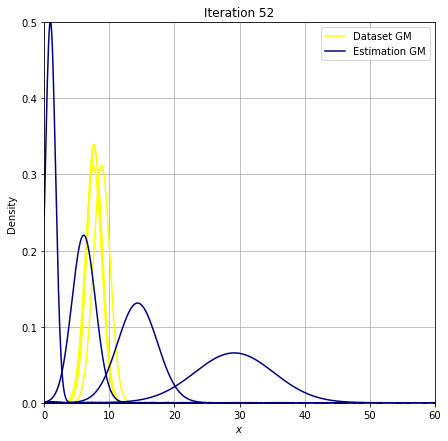

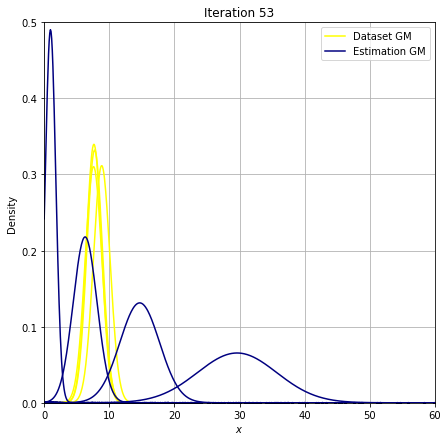

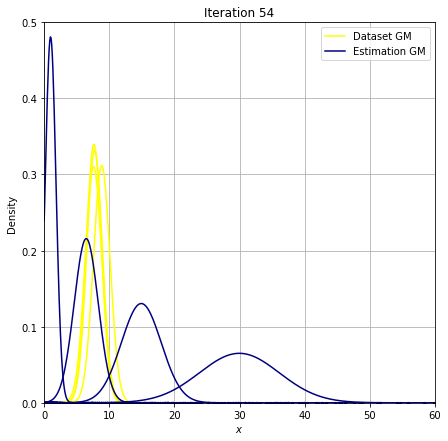

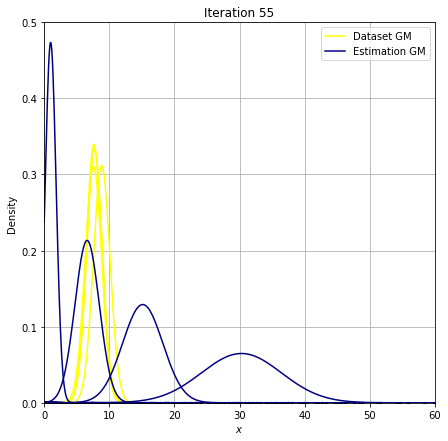

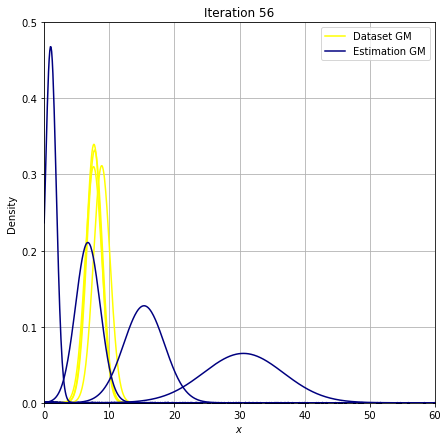

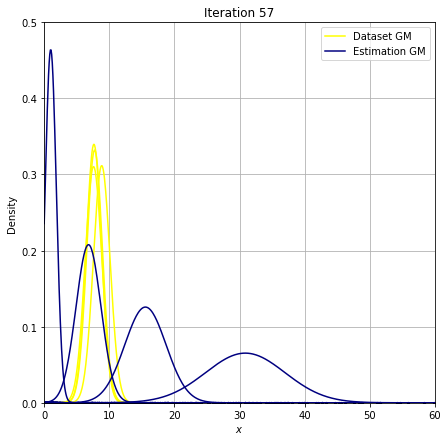

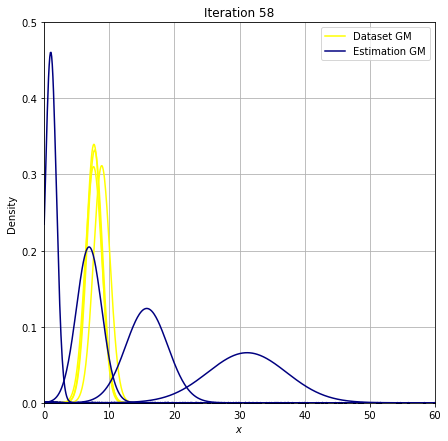

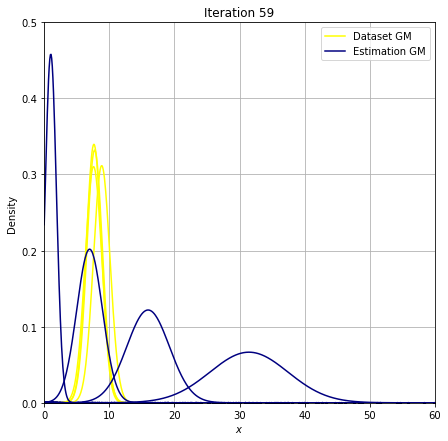

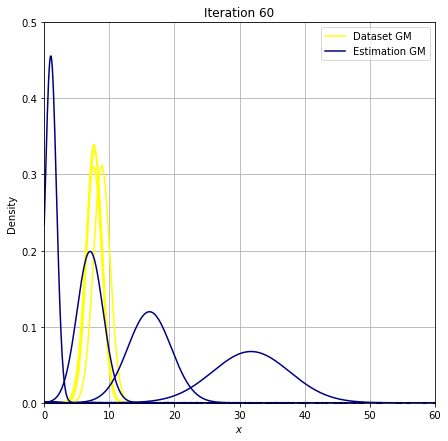

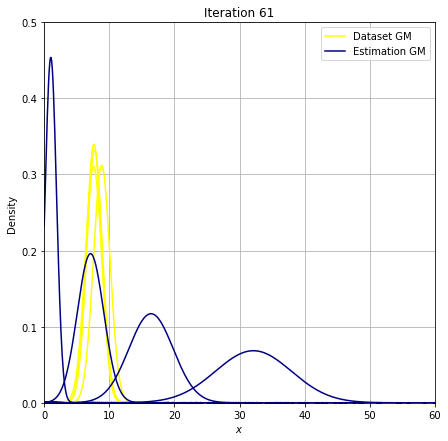

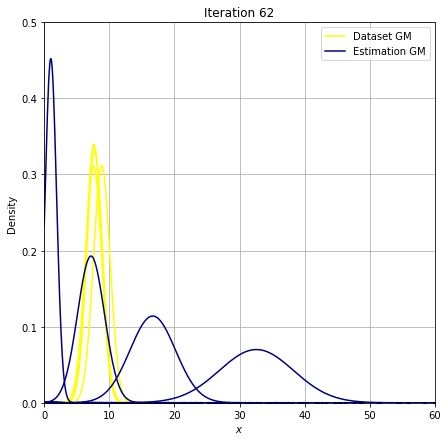

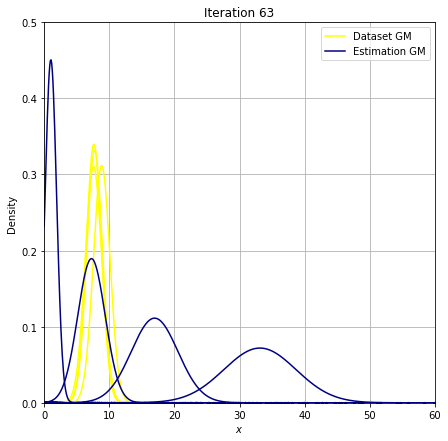

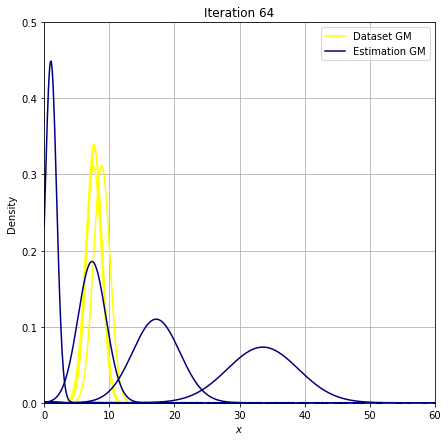

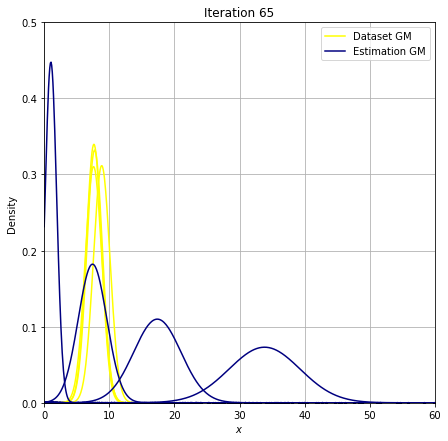

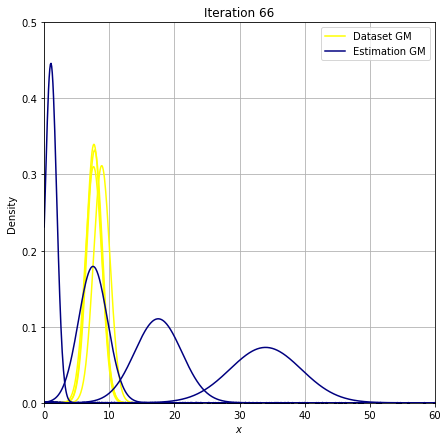

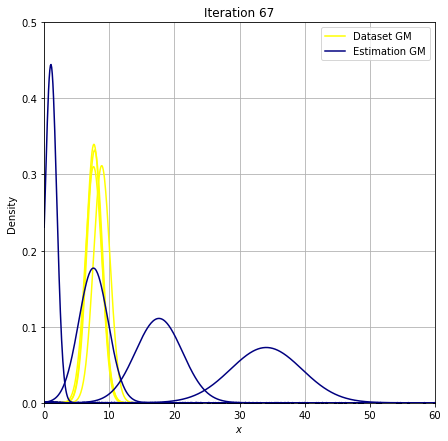

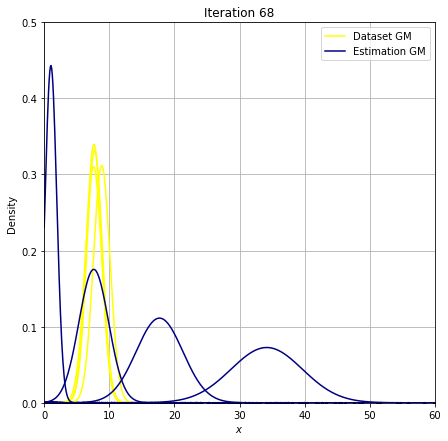

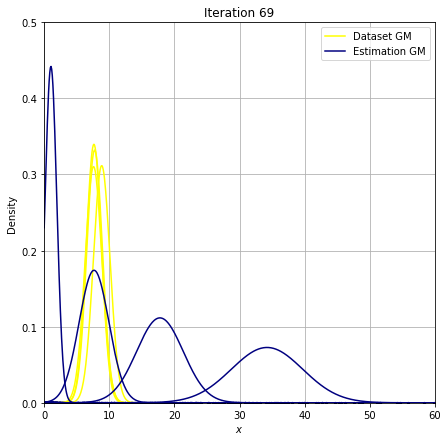

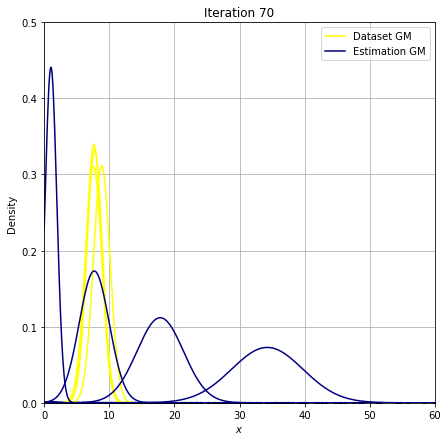

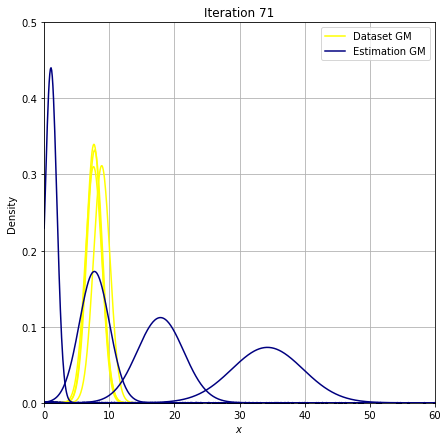

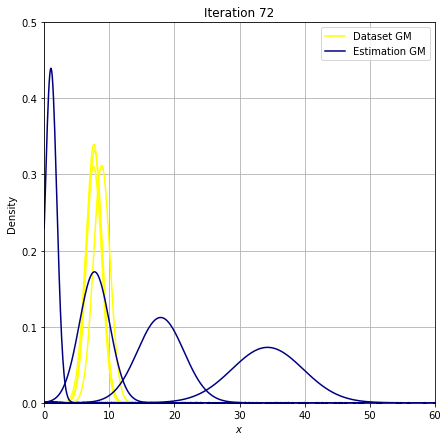

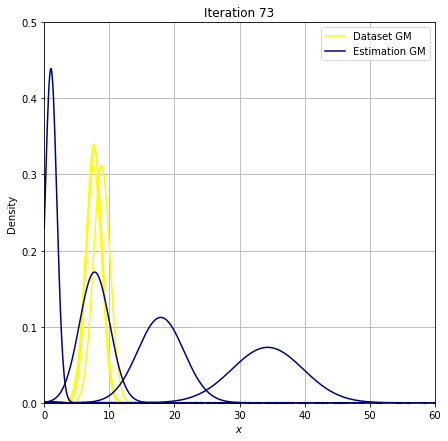

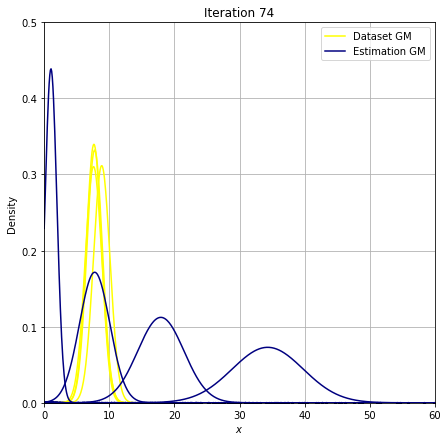

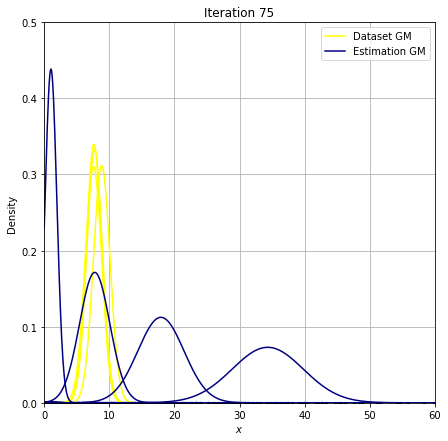

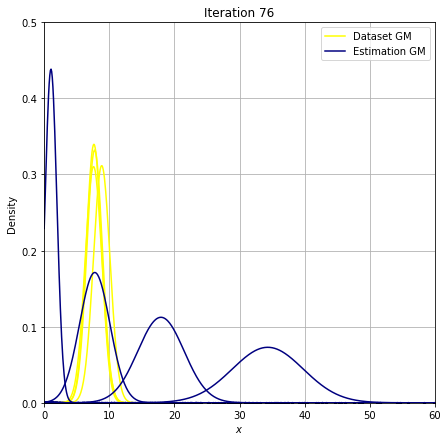

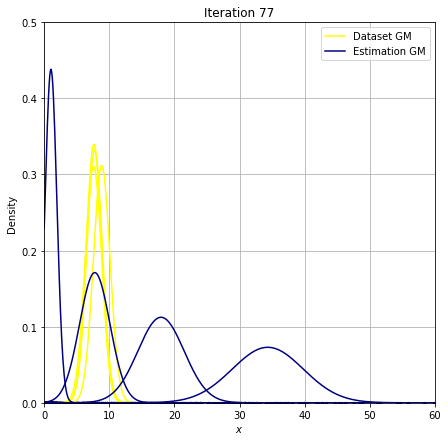

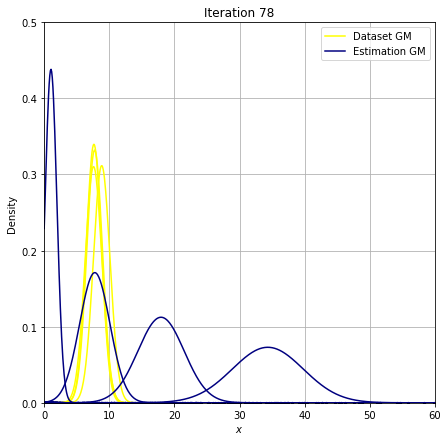

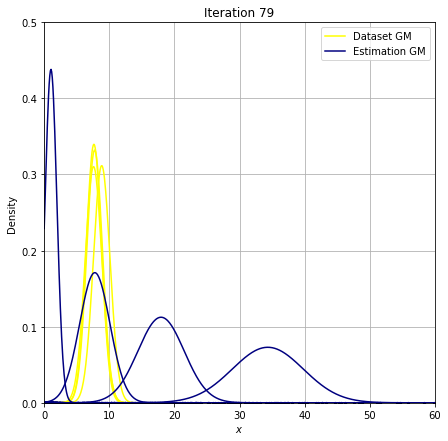

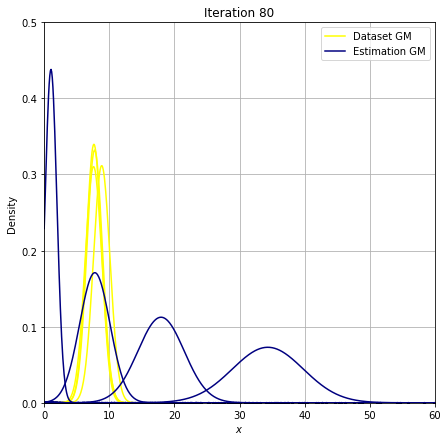

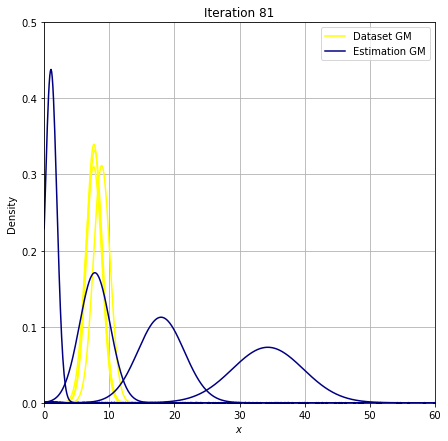

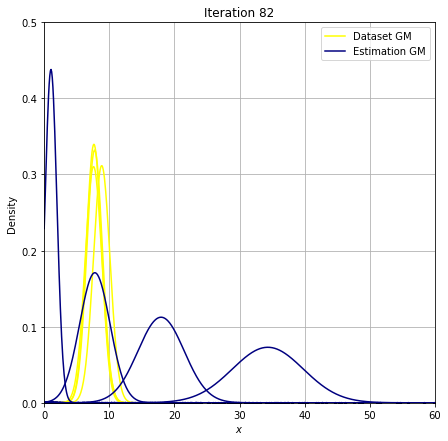

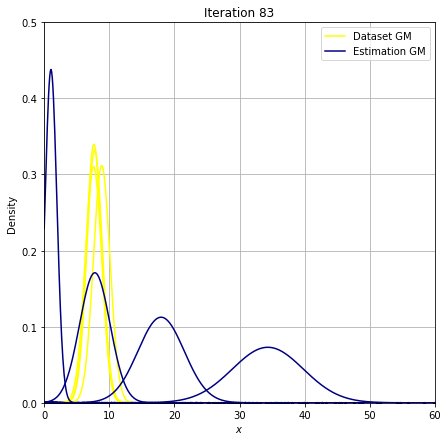

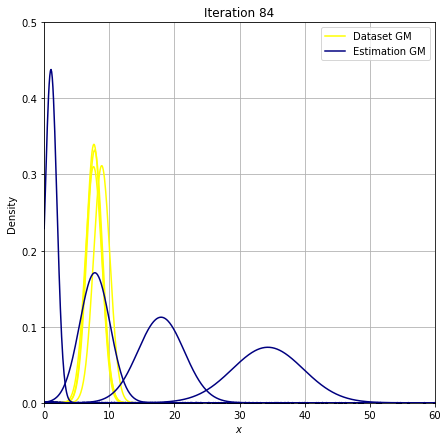

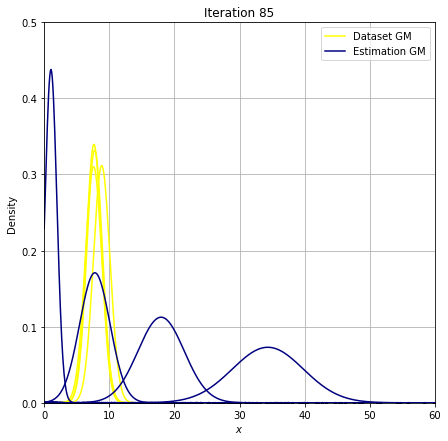

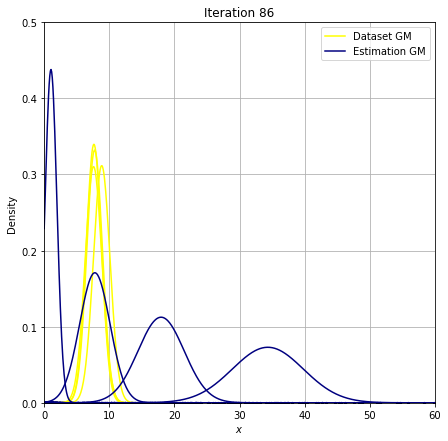

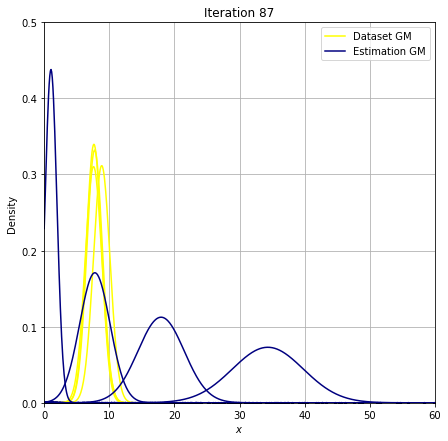

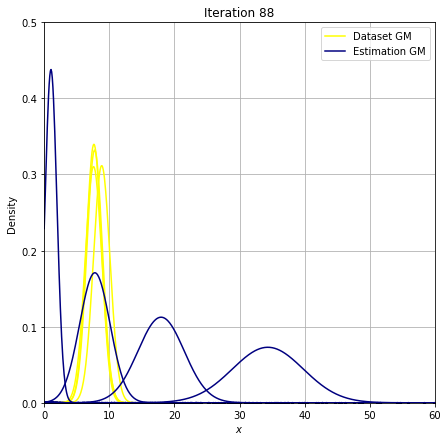

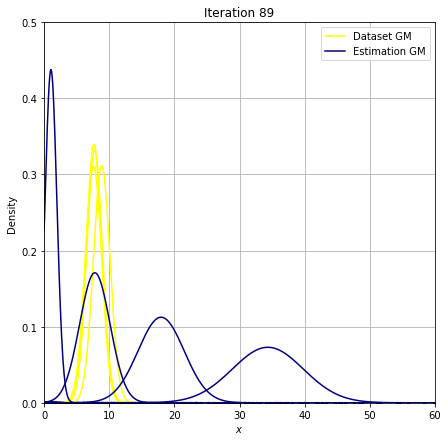

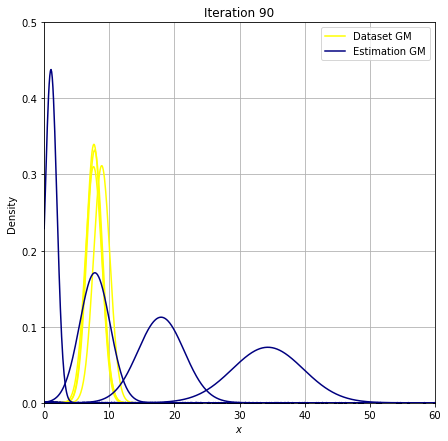

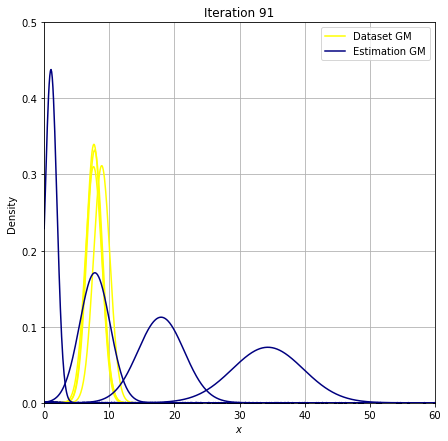

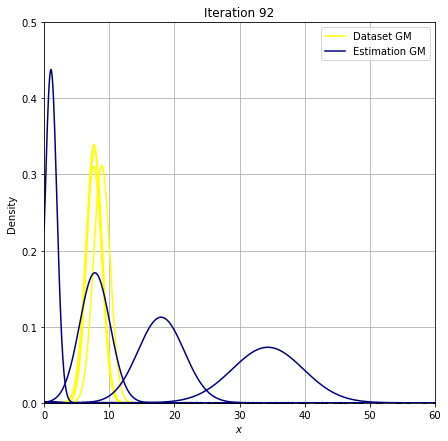

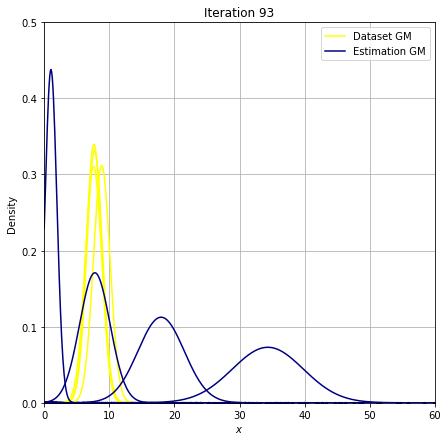

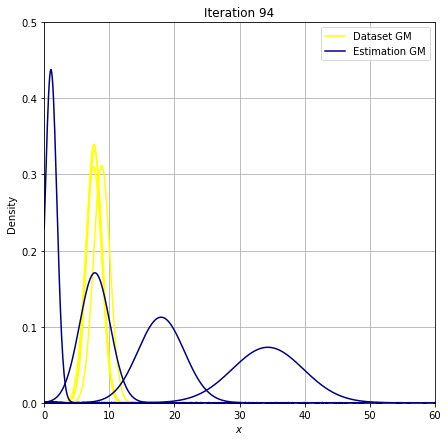

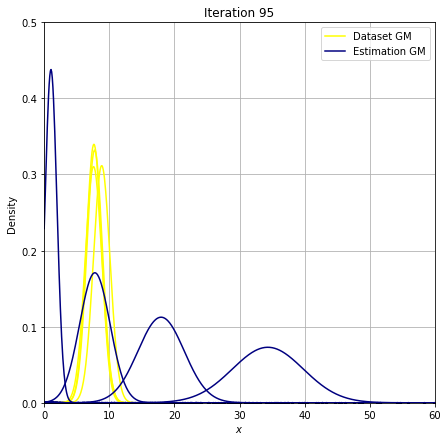

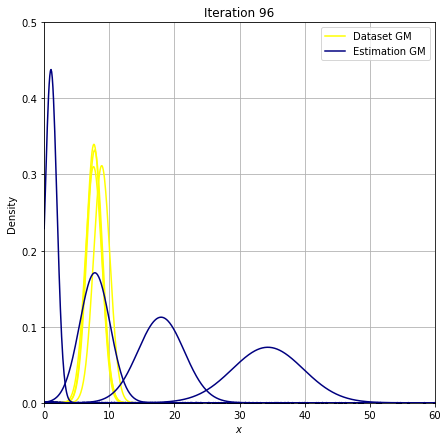

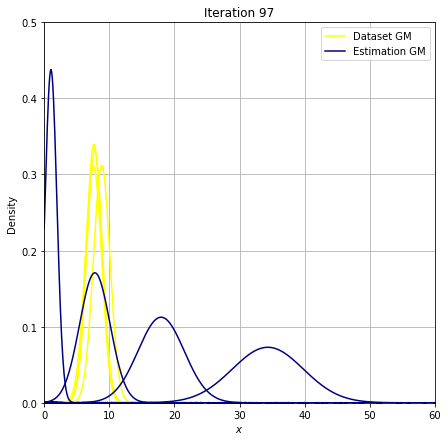

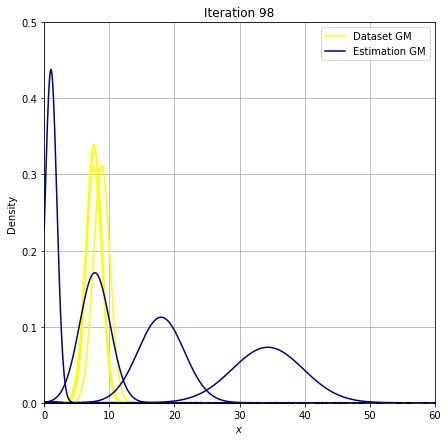

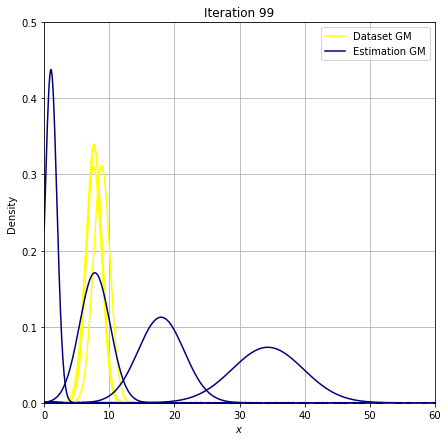

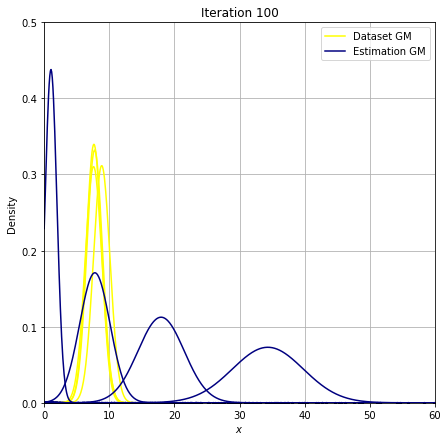

In [5]:
# Set eps to avoid divide by zero
eps = 1e-8
likelihood = []

# averaged over 100 random initializations

i_iter = 100
z_iter= 1
print("EM for Guassian Dsitribution \n")
for i in range(1,i_iter+1):
    for z in range(1,z_iter+1):
        if i % z_iter == 0:
            plt.figure(figsize = (7,7))
            axes = plt.gca()
            plt.xlabel("$x$")
            plt.ylabel("Density")
            plt.title("Iteration {}".format(i))
            plt.xlim(0,60)
            plt.ylim(0,0.500)
            plt.scatter(X,[0.00005]*len(X), color = 'navy', s=5)

            plt.plot(starts, gaussian_pdf(starts,mean0,sigma0),color = 'yellow',label = 'Dataset GM')
            plt.plot(starts, gaussian_pdf(starts,mean1,sigma1),color = 'yellow')
            plt.plot(starts, gaussian_pdf(starts,mean2,sigma2),color = 'yellow')
            plt.plot(starts, gaussian_pdf(starts,mean3,sigma3),color = 'yellow')

            plt.plot(starts, gaussian_pdf(starts,means[0],variance[0]),color = 'navy',label = 'Estimation GM')
            plt.plot(starts, gaussian_pdf(starts,means[1],variance[1]),color = 'navy')
            plt.plot(starts, gaussian_pdf(starts,means[2],variance[2]),color = 'navy')
            plt.plot(starts, gaussian_pdf(starts,means[3],variance[3]),color = 'navy')

            plt.legend(loc = 'upper right')
            plt.grid()
            plt.show()

        density = []
        for j in range(k):
            density.append(gaussian_pdf(X,means[j],np.sqrt(variance[j])))
        density = np.array(density)

        resp = []
        for j in range(k):
            resp.append( (density[j] * mix_prob[j]) / (np.sum([density[i]*mix_prob[i] for i in range(k)] ,axis = 0) + eps))

        for j in range(k):
            means[j] = np.sum(resp[j] * X)/(np.sum(resp[j]+eps))
            variance[j] = np.sum(resp[j] * np.square(X - means[j]))/ (np.sum(resp[j] +eps))

            mix_prob[j] = np.mean(resp[j])
        likelihood.append(np.sum(np.log(np.dot(density.transpose(),mix_prob.transpose()) + eps)))



### Plot the log-likelihood (averaged over 100 random initializations of the parameters) as a function of iterations.

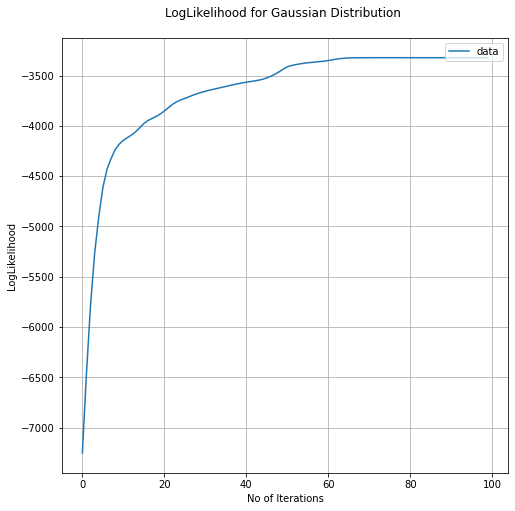

In [6]:
# Log Liklihood
plt.figure(figsize = (8,8))
#likelihood = np.reshape(likelihood,(100,100))
avg = np.mean(likelihood,axis = 0)
iterat = range(100)
plt.plot(iterat,likelihood, label = 'data')
plt.xlabel('No of Iterations')
plt.ylabel('LogLikelihood')
plt.title('LogLikelihood for Gaussian Distribution \n')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

### How does the plot compare with the plot from part (i)? Provide insights that you draw from this experiment.

#### The given data Data describes the curve till the next event. 
#### So it best suites for the Expoenential Model.
#### Because the number of iterations taken to move the mean towards the right-skew takes more iterations for Gaussian Model than the Exponential Model.
#### This is due to the variance change in Gaussian model. Where as There is no separate Variance needed to create the Expoenetial Model
#### Likelihood of the Expoenential is differently moving towards the exponential in the plots.
#### So Expoenential Model is better suit for this data.